    #1.ASK
    #1.0 Business task
    #.The average sales amount and the number of sales at each branch 
    #.The average unit price for each product line
    #.Do branches make more sale on a specific day of the week
    #.distribution of average sales amount by gender
    #.distribution of average sales amount by gender per branch
    #which is the most popular product line by quantity sold
    #which is the most profitable product line
    #1.1 Stakeholders
    #stakeholders include the following
    #.Marketing & sales director
    #.Analytics team
    #.Sales team
    #2.PREPARE
    #.The data is located on Kaggle & contains sales data of different branches over a 3 month period.
    #.Data is organized in csv files
    #.Credibility of data not in question
    #.This data has been stripped of all identifying information ensuring its privacy
    #3.PROCESS
    #.For this project I choose RStudio Desktop in order to prepare, process, clean, analyze and create the visualizations.
    #Data review involved the following:
    #.Checking column names across all the 12 original files.
    #.Checking for missing values.
    #.Checking of white spaces.
    #.Checking of duplicate records.
    #3.1 COLLECT & DATA WRANGLING
    #load readr for reading rectangular data
    #load dplyr for data wrangling
    #load ggplot2 for data visualization
    library(dplyr)
    ## 
    ## Attaching package: 'dplyr'
    ## The following objects are masked from 'package:stats':
    ## 
    ##     filter, lag
    ## The following objects are masked from 'package:base':
    ## 
    ##     intersect, setdiff, setequal, union
    library(readr)
    library(ggplot2)
    #read data set using the read_csv function
    supermarket_sales<-read_csv("C:/Users/user/Desktop/RSTUDIO/supermarket_sales.csv")
    ## Rows: 1000 Columns: 17
    ## -- Column specification --------------------------------------------------------
    ## Delimiter: ","
    ## chr  (8): Invoice_ID, Branch, City, Customer_type, Gender, Product_line, Dat...
    ## dbl  (8): Unit_price, Quantity, Tax _5%, Total, cogs, gross_margin_percentag...
    ## time (1): Time
    ## 
    ## i Use `spec()` to retrieve the full column specification for this data.
    ## i Specify the column types or set `show_col_types = FALSE` to quiet this message.
    #3.2 Data Validation
    head(supermarket_sales,5)
    ## # A tibble: 5 x 17
    ##   Invoice_ID  Branch City  Customer_type Gender Product_line Unit_price Quantity
    ##   <chr>       <chr>  <chr> <chr>         <chr>  <chr>             <dbl>    <dbl>
    ## 1 750-67-8428 A      Yang~ Member        Female Health and ~       74.7        7
    ## 2 226-31-3081 C      Nayp~ Normal        Female Electronic ~       15.3        5
    ## 3 631-41-3108 A      Yang~ Normal        Male   Home and li~       46.3        7
    ## 4 123-19-1176 A      Yang~ Member        Male   Health and ~       58.2        8
    ## 5 373-73-7910 A      Yang~ Normal        Male   Sports and ~       86.3        7
    ## # ... with 9 more variables: Tax _5% <dbl>, Total <dbl>, Date <chr>,
    ## #   Time <time>, Payment <chr>, cogs <dbl>, gross_margin_percentage <dbl>,
    ## #   gross_income <dbl>, Rating <dbl>
    tail(supermarket_sales)
    ## # A tibble: 6 x 17
    ##   Invoice_ID  Branch City  Customer_type Gender Product_line Unit_price Quantity
    ##   <chr>       <chr>  <chr> <chr>         <chr>  <chr>             <dbl>    <dbl>
    ## 1 652-49-6720 C      Nayp~ Member        Female Electronic ~       61.0        1
    ## 2 233-67-5758 C      Nayp~ Normal        Male   Health and ~       40.4        1
    ## 3 303-96-2227 B      Mand~ Normal        Female Home and li~       97.4       10
    ## 4 727-02-1313 A      Yang~ Member        Male   Food and be~       31.8        1
    ## 5 347-56-2442 A      Yang~ Normal        Male   Home and li~       65.8        1
    ## 6 849-09-3807 A      Yang~ Member        Female Fashion acc~       88.3        7
    ## # ... with 9 more variables: Tax _5% <dbl>, Total <dbl>, Date <chr>,
    ## #   Time <time>, Payment <chr>, cogs <dbl>, gross_margin_percentage <dbl>,
    ## #   gross_income <dbl>, Rating <dbl>
    str(supermarket_sales)
    ## spec_tbl_df [1,000 x 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
    ##  $ Invoice_ID             : chr [1:1000] "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
    ##  $ Branch                 : chr [1:1000] "A" "C" "A" "A" ...
    ##  $ City                   : chr [1:1000] "Yangon" "Naypyitaw" "Yangon" "Yangon" ...
    ##  $ Customer_type          : chr [1:1000] "Member" "Normal" "Normal" "Member" ...
    ##  $ Gender                 : chr [1:1000] "Female" "Female" "Male" "Male" ...
    ##  $ Product_line           : chr [1:1000] "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
    ##  $ Unit_price             : num [1:1000] 74.7 15.3 46.3 58.2 86.3 ...
    ##  $ Quantity               : num [1:1000] 7 5 7 8 7 7 6 10 2 3 ...
    ##  $ Tax _5%                : num [1:1000] 26.14 3.82 16.22 23.29 30.21 ...
    ##  $ Total                  : num [1:1000] 549 80.2 340.5 489 634.4 ...
    ##  $ Date                   : chr [1:1000] "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
    ##  $ Time                   : 'hms' num [1:1000] 13:08:00 10:29:00 13:23:00 20:33:00 ...
    ##   ..- attr(*, "units")= chr "secs"
    ##  $ Payment                : chr [1:1000] "Ewallet" "Cash" "Credit card" "Ewallet" ...
    ##  $ cogs                   : num [1:1000] 522.8 76.4 324.3 465.8 604.2 ...
    ##  $ gross_margin_percentage: num [1:1000] 4.76 4.76 4.76 4.76 4.76 ...
    ##  $ gross_income           : num [1:1000] 26.14 3.82 16.22 23.29 30.21 ...
    ##  $ Rating                 : num [1:1000] 9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
    ##  - attr(*, "spec")=
    ##   .. cols(
    ##   ..   Invoice_ID = col_character(),
    ##   ..   Branch = col_character(),
    ##   ..   City = col_character(),
    ##   ..   Customer_type = col_character(),
    ##   ..   Gender = col_character(),
    ##   ..   Product_line = col_character(),
    ##   ..   Unit_price = col_double(),
    ##   ..   Quantity = col_double(),
    ##   ..   `Tax _5%` = col_double(),
    ##   ..   Total = col_double(),
    ##   ..   Date = col_character(),
    ##   ..   Time = col_time(format = ""),
    ##   ..   Payment = col_character(),
    ##   ..   cogs = col_double(),
    ##   ..   gross_margin_percentage = col_double(),
    ##   ..   gross_income = col_double(),
    ##   ..   Rating = col_double()
    ##   .. )
    ##  - attr(*, "problems")=<externalptr>
    glimpse(supermarket_sales)
    ## Rows: 1,000
    ## Columns: 17
    ## $ Invoice_ID              <chr> "750-67-8428", "226-31-3081", "631-41-3108", "~
    ## $ Branch                  <chr> "A", "C", "A", "A", "A", "C", "A", "C", "A", "~
    ## $ City                    <chr> "Yangon", "Naypyitaw", "Yangon", "Yangon", "Ya~
    ## $ Customer_type           <chr> "Member", "Normal", "Normal", "Member", "Norma~
    ## $ Gender                  <chr> "Female", "Female", "Male", "Male", "Male", "M~
    ## $ Product_line            <chr> "Health and beauty", "Electronic accessories",~
    ## $ Unit_price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8~
    ## $ Quantity                <dbl> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10~
    ## $ `Tax _5%`               <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29~
    ## $ Total                   <dbl> 548.9715, 80.2200, 340.5255, 489.0480, 634.378~
    ## $ Date                    <chr> "1/5/2019", "3/8/2019", "3/3/2019", "1/27/2019~
    ## $ Time                    <time> 13:08:00, 10:29:00, 13:23:00, 20:33:00, 10:37~
    ## $ Payment                 <chr> "Ewallet", "Cash", "Credit card", "Ewallet", "~
    ## $ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,~
    ## $ gross_margin_percentage <dbl> 4.761905, 4.761905, 4.761905, 4.761905, 4.7619~
    ## $ gross_income            <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29~
    ## $ Rating                  <dbl> 9.1, 9.6, 7.4, 8.4, 5.3, 4.1, 5.8, 8.0, 7.2, 5~
    #4Data Cleaning
    #Check for missing values
    colSums(is.na(supermarket_sales))
    ##              Invoice_ID                  Branch                    City 
    ##                       0                       0                       0 
    ##           Customer_type                  Gender            Product_line 
    ##                       0                       0                       0 
    ##              Unit_price                Quantity                 Tax _5% 
    ##                       0                       0                       0 
    ##                   Total                    Date                    Time 
    ##                       0                       0                       0 
    ##                 Payment                    cogs gross_margin_percentage 
    ##                       0                       0                       0 
    ##            gross_income                  Rating 
    ##                       0                       0
    #check for duplicates
    distinct(supermarket_sales)
    ## # A tibble: 1,000 x 17
    ##    Invoice_ID Branch City  Customer_type Gender Product_line Unit_price Quantity
    ##    <chr>      <chr>  <chr> <chr>         <chr>  <chr>             <dbl>    <dbl>
    ##  1 750-67-84~ A      Yang~ Member        Female Health and ~       74.7        7
    ##  2 226-31-30~ C      Nayp~ Normal        Female Electronic ~       15.3        5
    ##  3 631-41-31~ A      Yang~ Normal        Male   Home and li~       46.3        7
    ##  4 123-19-11~ A      Yang~ Member        Male   Health and ~       58.2        8
    ##  5 373-73-79~ A      Yang~ Normal        Male   Sports and ~       86.3        7
    ##  6 699-14-30~ C      Nayp~ Normal        Male   Electronic ~       85.4        7
    ##  7 355-53-59~ A      Yang~ Member        Female Electronic ~       68.8        6
    ##  8 315-22-56~ C      Nayp~ Normal        Female Home and li~       73.6       10
    ##  9 665-32-91~ A      Yang~ Member        Female Health and ~       36.3        2
    ## 10 692-92-55~ B      Mand~ Member        Female Food and be~       54.8        3
    ## # ... with 990 more rows, and 9 more variables: Tax _5% <dbl>, Total <dbl>,
    ## #   Date <chr>, Time <time>, Payment <chr>, cogs <dbl>,
    ## #   gross_margin_percentage <dbl>, gross_income <dbl>, Rating <dbl>
    #5.Analysis
    #.The average sales amount per branch
    avg_sales_amnt<-supermarket_sales%>%
      group_by(Branch)%>%
      summarise(avg_sales=mean(Total))
    avg_sales_amnt
    ## # A tibble: 3 x 2
    ##   Branch avg_sales
    ##   <chr>      <dbl>
    ## 1 A           312.
    ## 2 B           320.
    ## 3 C           337.
    #.The average unit price of products in each product line
    avg_unit_price<-supermarket_sales%>%
      group_by(Product_line)%>%
      summarise(avg_unit_price=mean(Unit_price))%>%
      arrange(desc(avg_unit_price))
    avg_unit_price
    ## # A tibble: 6 x 2
    ##   Product_line           avg_unit_price
    ##   <chr>                           <dbl>
    ## 1 Fashion accessories              57.2
    ## 2 Sports and travel                57.0
    ## 3 Food and beverages               56.0
    ## 4 Home and lifestyle               55.3
    ## 5 Health and beauty                54.9
    ## 6 Electronic accessories           53.6
    #.distribution of average sales amount by gender
    avg_sales_by_gender<-supermarket_sales%>%
      group_by(Gender)%>%
      summarise(avg_sales=mean(Total))
    avg_sales_by_gender
    ## # A tibble: 2 x 2
    ##   Gender avg_sales
    ##   <chr>      <dbl>
    ## 1 Female      335.
    ## 2 Male        311.
    #.distribution of average sales amount by gender per branch
    avg_sales_by_gender_branch<-supermarket_sales%>%
      group_by(Gender,Branch)%>%
      summarise(avg_sales=mean(Total))
    ## `summarise()` has grouped output by 'Gender'. You can override using the `.groups` argument.
    avg_sales_by_gender_branch
    ## # A tibble: 6 x 3
    ## # Groups:   Gender [2]
    ##   Gender Branch avg_sales
    ##   <chr>  <chr>      <dbl>
    ## 1 Female A           331.
    ## 2 Female B           327.
    ## 3 Female C           347.
    ## 4 Male   A           296.
    ## 5 Male   B           313.
    ## 6 Male   C           326.
    #which is the most popular product line by quantity sold
    popular_product<-supermarket_sales%>%
      group_by(Product_line)%>%
      summarise(avg_qnty=mean(Quantity))%>%
      arrange(desc(avg_qnty))
    popular_product
    ## # A tibble: 6 x 2
    ##   Product_line           avg_qnty
    ##   <chr>                     <dbl>
    ## 1 Electronic accessories     5.71
    ## 2 Home and lifestyle         5.69
    ## 3 Health and beauty          5.62
    ## 4 Sports and travel          5.54
    ## 5 Food and beverages         5.47
    ## 6 Fashion accessories        5.07
    #which is the most profitable product line
    profitable_product<-supermarket_sales%>%
      group_by(Product_line)%>%
      summarise(avg_gross_income=mean(gross_income))%>%
      arrange(desc(avg_gross_income))
    profitable_product
    ## # A tibble: 6 x 2
    ##   Product_line           avg_gross_income
    ##   <chr>                             <dbl>
    ## 1 Home and lifestyle                 16.0
    ## 2 Sports and travel                  15.8
    ## 3 Health and beauty                  15.4
    ## 4 Food and beverages                 15.4
    ## 5 Electronic accessories             15.2
    ## 6 Fashion accessories                14.5
    #6.VISUALIZATON
    #.The average sales amount per branch
    ggplot(avg_sales_amnt, aes(x=Branch,y=avg_sales))+
             geom_col()

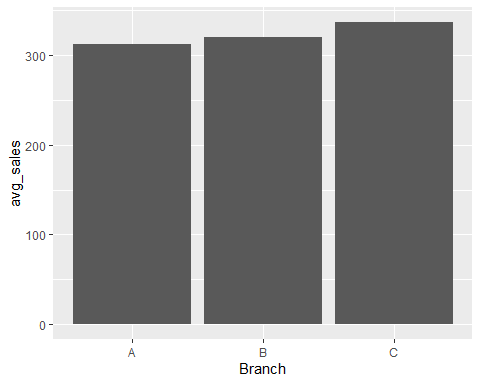

    #.The average unit price of products in each product line
    ggplot(avg_unit_price,aes(x=Product_line,y=avg_unit_price))+
      geom_col()

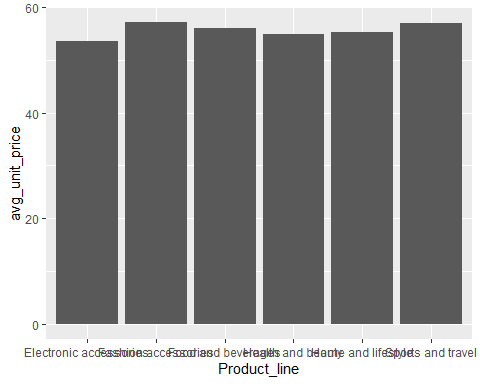

    #.distribution of average sales amount by gender
    ggplot(avg_sales_by_gender,aes(x=Gender,y=avg_sales,color=Gender))+
      geom_col()

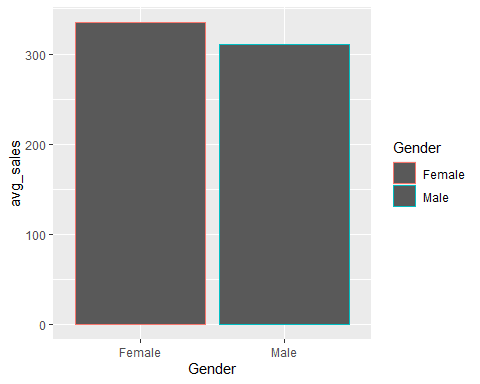

    #.distribution of average sales amount by gender per branch
    ggplot(avg_sales_by_gender_branch,aes(x=Gender,y=avg_sales))+
      geom_col()+
      facet_wrap(~Branch)

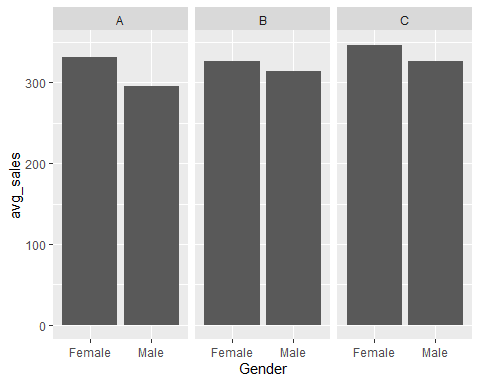

    #which is the most popular product line by quantity sold
    ggplot(popular_product,aes(x=Product_line,y=avg_qnty))+
      geom_col()

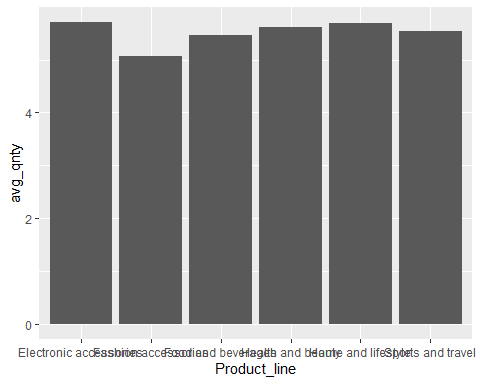

    #which is the most profitable product line
    ggplot(profitable_product,aes(x=Product_line,y=avg_gross_income,color=Product_line))+
      geom_col()

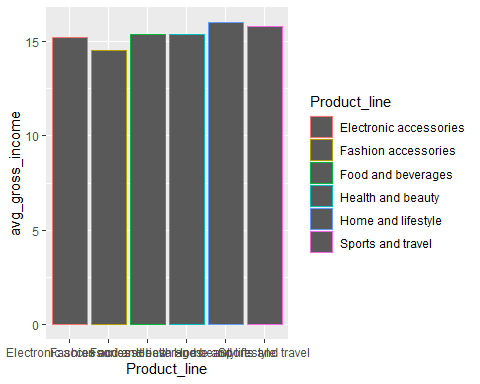